<a href="https://colab.research.google.com/github/emoryhubbard/RoadSignRecognition/blob/main/roadsign_32x32model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network for Road Sign Recognition

This CNN is an image classifer I created and fine-tuned for recognizing German road signs, for usage by a hypothetical self-driving car, and which achieved 92% accuracy. I experimented with several different architectures, including Xception-based models.

Five different variations of road sign recognition models were developed in order to try as many approaches as feasible. A much higher performance is achievable, when any of these models is compared to performance of other state-of-the-art models for similar problems, and with more time to experiment and fine-tune, it is clear those performances can be matched based on the rate of improvement below.

##Xception and Custom Model Comparisons

###I. Xception-based 71x71 Model Results
The Xception-based 71x71 Model created for road sign recognition demonstrated that it was possible to incorporate an existing, pre-trained CNN architecture to use on this problem, and achieve functional image classification, ie. transfer learning. It also demonstrated data augmentation being performed in a separate layer, integrated into the model.
The training accuracy was 71%, and the validation accuracy was 49%, which is in need of much improvement.
However, this model was capable of being trained within several minutes, making it practical as a proof-of-concept test before larger, more ambitious models were trained.

###II. Xception-based 150x150 Model Results
The small input image size of 71x71 enabled the Xception-based 71x71 Model to be trained faster, but it was suspected that this might be impacting the performance negatively. To test this hypothesis and improve performance, the images were resized to use 150x150 pixels for this model.
The results yield an increase in validation accuracy from 49% to approximately 62%, and it took approximately 4 hours of training time.
There is a final fine-tuning process that can be applied to increase model performance further, perhaps as much as 2% or 5%, with both this and the previous model, but due to the low final validation accuracy, efforts instead turned to alternative architectures.

###III. Custom 100x100 Architecture Results
A model with the following shape was constructed for this problem:

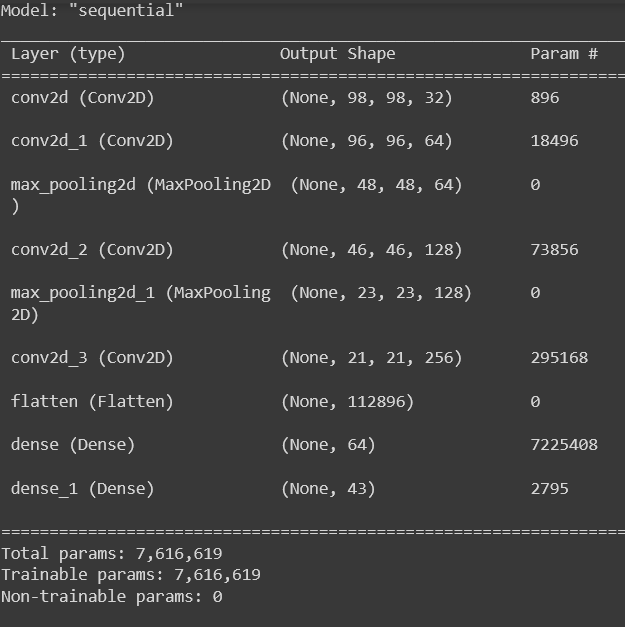

Compared to the previous model, the validation accuracy increased from 62% to 88%.

However, in the process of creating this model, there was a bit of serendipity, as an earlier test model actually achieved higher accuracy, which will be described next.

###IV. Custom 32x32 Architecture Results
It was unexpected that a 32x32 image resizing would perform better than the model taking 100x100 images. It was only intended as a brief test before training the larger model.

However, the results were better than all previous attempts:

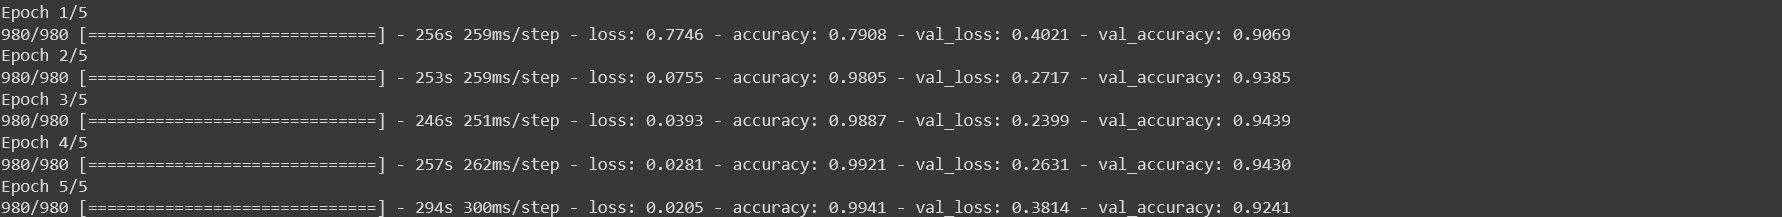

This is a validation accuracy of 92%, improving upon the 88% previously described.

To confirm this validation accuracy, the next step was testing the model against a partial hold-out set, which revealed the following accuracy report. Since the accuracy number in this report is similar, this indicates that the model is performing as intended.

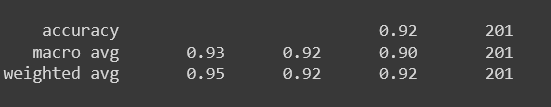

Source code for initializing and training the final model appears below.

In [ ]:
!echo "Downloading files..."
!wget -q https://github.com/emoryhubbard/RoadSignRecognition/raw/main/data/roadsigns/training1.zip
!wget -q https://github.com/emoryhubbard/RoadSignRecognition/raw/main/data/roadsigns/training2.zip
!wget -q https://github.com/emoryhubbard/RoadSignRecognition/raw/main/data/roadsigns/test.zip
!wget -q https://github.com/emoryhubbard/RoadSignRecognition/raw/main/data/roadsigns/test_partial.zip
!wget -q https://github.com/emoryhubbard/RoadSignRecognition/raw/main/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip
!unzip -q /content/test_partial.zip

!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_dir = '/content/training/'
image_size = (32, 32)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=32,
        class_mode='sparse',
        seed=42,shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        seed=42)



Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


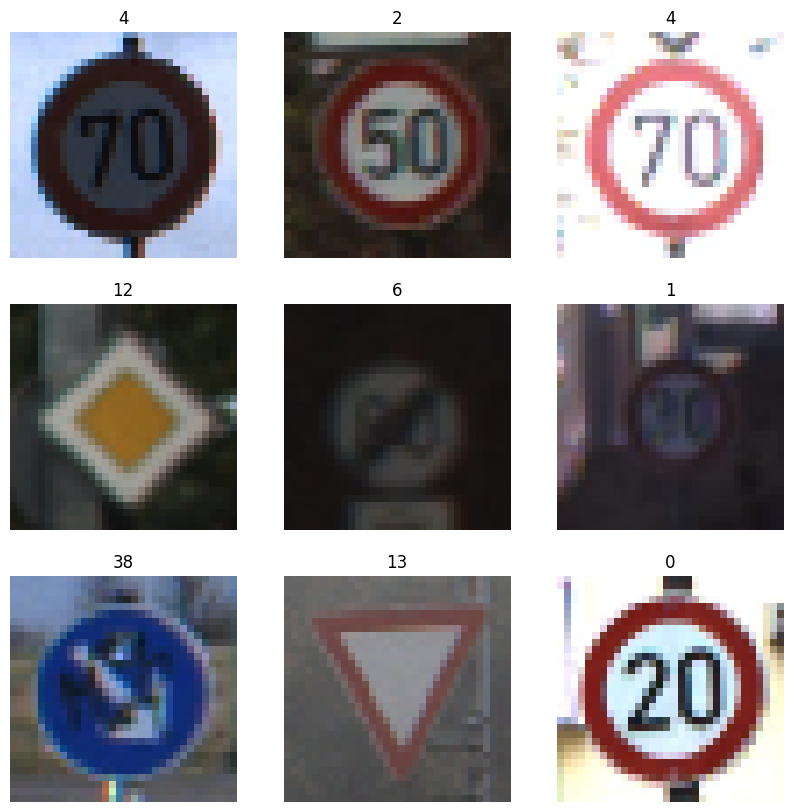

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))
#history = model.fit(train_images, train_labels, epochs=5,
#                     validation_split = .2)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = model.fit(x=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5
)

Epoch 1/5
980/980 [==============================] - 261s 264ms/step - loss: 0.9595 - accuracy: 0.7361 - val_loss: 0.5017 - val_accuracy: 0.8647
Epoch 2/5
980/980 [==============================] - 255s 260ms/step - loss: 0.0771 - accuracy: 0.9788 - val_loss: 0.4676 - val_accuracy: 0.9034
Epoch 3/5
980/980 [==============================] - 257s 262ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.2536 - val_accuracy: 0.9415
Epoch 4/5
980/980 [==============================] - 262s 268ms/step - loss: 0.0268 - accuracy: 0.9924 - val_loss: 0.3024 - val_accuracy: 0.9305
Epoch 5/5
980/980 [==============================] - 254s 259ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.3995 - val_accuracy: 0.9329


In [ ]:
# original_model = model

In [ ]:
from tensorflow import keras

# How to save model:
# Run this and download the zip file that appears in colab to your computer:
# model.save('32x32model')
# !zip -r models/32x32model.zip 32x32model

# How to load model:
# Upload the model's zip file to colab. Then you can run this:
#!unzip -q 32x32model.zip
#model = keras.models.load_model('32x32model')

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 201 images belonging to 1 classes.
7/7 [==============================] - 1s 55ms/step


In [ ]:
import tensorflow as tf
from tensorflow import data

# test_images_ds = data.Dataset.from_generator(test_generator)

test_generator_extractor = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        batch_size=201,
        class_mode='sparse',
        shuffle=False)

test_X, test_y = test_generator_extractor.next()
#test_X

Found 201 images belonging to 1 classes.


In [ ]:
test_labels_df = pd.read_csv('test_classes_partial.csv')
test_labels_df.head()
test_labels_np = test_labels_df['ClassId'].to_numpy()
#test_labels_np

In [ ]:
test_labels_nested_list = []
for arr in np.nditer(test_labels_np):
  arrEnclosed = [arr]
  test_labels_nested_list.append(arrEnclosed)
test_labels_nested_np = np.array(test_labels_nested_list)
test_labels_nested_np = test_labels_nested_np.astype('uint8')
#test_labels_nested_np


7/7 - 0s - loss: 0.2641 - accuracy: 0.9453 - 466ms/epoch - 67ms/step
0.2641185224056244 0.9452736377716064


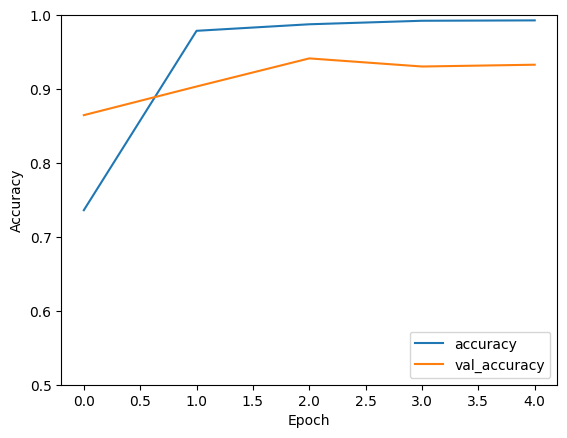

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_labels_nested_np, verbose=2)
print(test_loss,test_acc)

In [ ]:
import numpy as np

from sklearn.metrics import confusion_matrix
predictions_new = np.argmax(probabilities, axis=1)
confusion_matrix(test_labels_nested_np, predictions_new)

array([[11,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0,  9, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  8,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

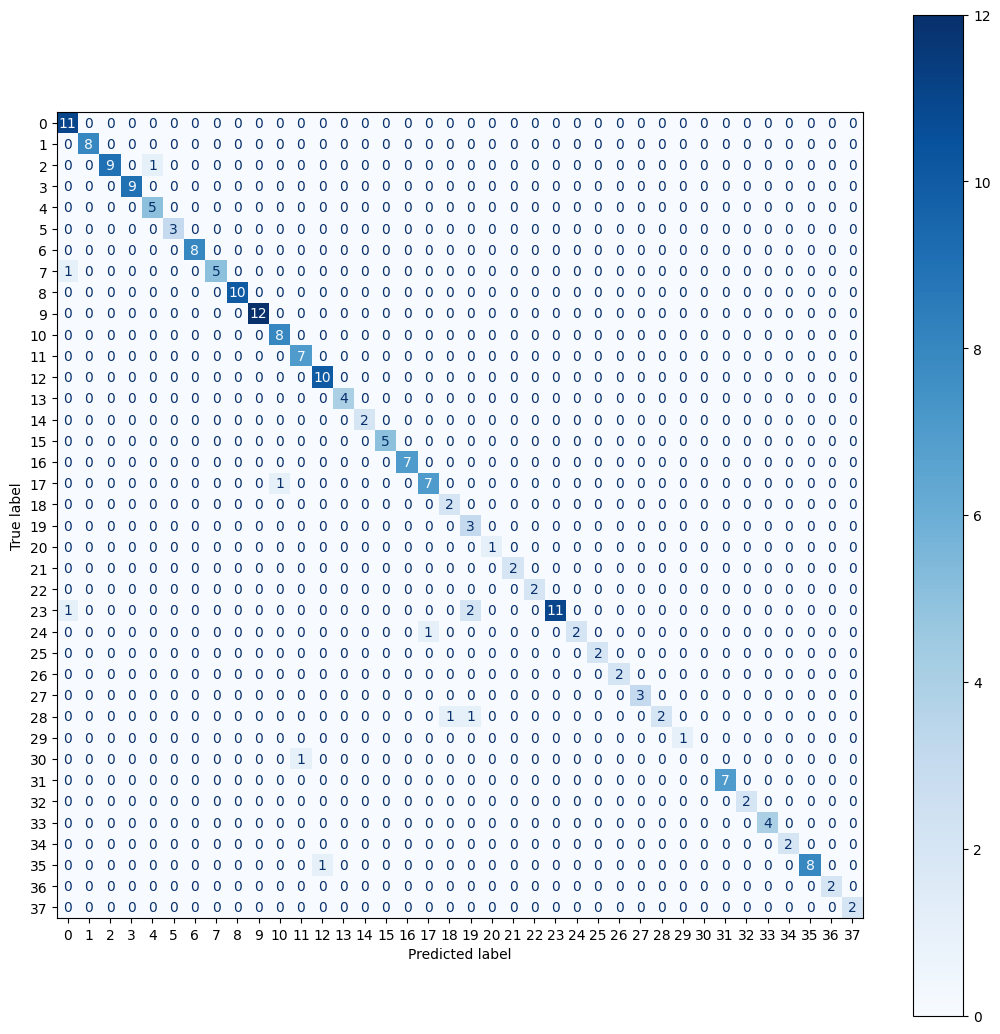

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels_nested_np, predictions_new)
cmd = ConfusionMatrixDisplay(cm)
#cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(13,13)) # For changing the size of the plot
cmd.plot(ax=ax, cmap="Blues", values_format='.5g') # The .5g is for removing scientific notation in the confusion matrix

# plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels_nested_np, predictions_new))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00         8
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         9
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        12
          11       0.89      1.00      0.94         8
          12       0.88      1.00      0.93         7
          13       0.91      1.00      0.95        10
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         7
          18       0.88    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
